In [1]:
# Everything needed in order to get this to look kinda nice
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils.detection import DAOStarFinder as DAO
import numpy as np
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture as ca
from astropy.stats import sigma_clipped_stats as scs # from the yt tutoral I found online :3

In [2]:
# Everything commented out will be either added in later or isn't needed
# Also make sure everything is in the same directory cause I'm too lazy to make it so it works anywhere :3

# This is code that will find and plot sources on Hubble images (mainly for astrometry purposes)
# It will also create tables that lists their coordinates

In [3]:
# Global Variables

pre_ex = fits.open('wfc3.f350lp.ref_0001.drz_cropped.fits') # The name in the quotes 
                                                            # is the file name for the pre-explosion image

post_ex = fits.open('iey918020_drc_cropped.fits') # Same applies to this one

pre_data = pre_ex[0]

post_data = post_ex[1] # Make sure this one is uses 1 instead of 0 for some reason

img1 = pre_data.data
img2 = post_data.data

#Using Data from a file for new coordinates

post_sources_matched = np.loadtxt('matched_list.dat', usecols = (0, 1), ndmin= 2)

pre_sources_matched = np.loadtxt('matched_list.dat', usecols= (2, 3), ndmin=2)


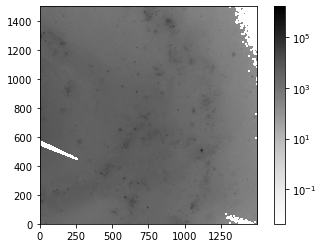

In [4]:
# Plotting the Images (This is if you don't have Ds9 to look at the pretty images)

#Pre Explosion Image

plt.figure()
plt.imshow(img1, origin = 'lower', norm = LogNorm(), cmap = 'Greys')
plt.colorbar()
plt.show()

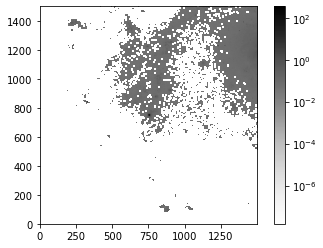

In [5]:
#Post Explosion Image

plt.figure()
plt.imshow(img2, origin = 'lower', norm = LogNorm(), cmap='Greys')
plt.colorbar()
plt.show()

In [6]:
#Finding the mean, median and standard deviation of each image

#Pre
mean, median, std = scs(img1)

#Post

mean2, median2, std2 = scs(img2)

In [7]:
# Actually detecting the stars w/ Their table of Coordinates + writing coordinates to region files

#Pre Explosion

daopre = DAO(fwhm = 3.0, threshold = 5.0 * std)

sources1 = daopre(img1-median)

# Writing DS9 Region File
j = open('wfc3.f350lp.ref_0001.drz_cropped_sources.reg', 'w')

x_pos = np.array(sources1['xcentroid'])
y_pos = np.array(sources1['ycentroid'])

x_round = ['%.3f' % x for x in x_pos]
y_round = ['%.3f' % y for y in y_pos]

for i in range (0, len(x_round)):
    j.write('point('+str(x_round[i])+','+str(y_round[i])+')'+' # '+ 'point=boxcircle text={'+str(i)+'} \n')
j.close()

# Exporting Table
for col in sources1.colnames:
    if col not in ('id', 'npix'):
        sources1[col].info.format = '%.2f'
        
sources1.pprint(max_width = 76)

 id xcentroid ycentroid sharpness roundness1 ... sky     peak   flux  mag 
--- --------- --------- --------- ---------- ... ---- --------- ---- -----
  1     40.11      3.30      0.57       0.02 ... 0.00 111460.93 9.94 -2.49
  2    949.94      7.25      0.57       0.01 ... 0.00  13552.51 1.16 -0.16
  3    744.02      9.01      0.61      -0.14 ... 0.00  33247.41 2.83 -1.13
  4    940.15     12.06      0.60       0.25 ... 0.00  13861.39 1.04 -0.04
  5   1027.31     12.48      0.60       0.13 ... 0.00  11634.48 1.09 -0.09
  6    689.79     13.58      0.55       0.19 ... 0.00  13093.08 1.01 -0.01
  7   1011.97     16.69      0.52      -0.41 ... 0.00  19297.15 1.40 -0.37
  8    562.03     36.72      0.44       0.15 ... 0.00  18768.99 1.29 -0.28
  9    918.71     52.02      0.58      -0.54 ... 0.00  12874.89 1.14 -0.14
 10    531.06     62.14      0.58      -0.28 ... 0.00  25452.36 2.27 -0.89
...       ...       ...       ...        ... ...  ...       ...  ...   ...
468    877.52   1397.71  

In [8]:
# Post Explosion

mask = np.zeros(img2.shape, dtype = bool)
mask[700:890, 720:770] = True

daopost = DAO(fwhm = 3.0, threshold = 5.0 * std2)

sources2 = daopost(img2-median, mask = mask)
# Writing the Region File
f = open('iey918020_drc_cropped_fits_sources.reg', 'w')


x_pos_2 = np.array(sources2['xcentroid'])
y_pos_2 = np.array(sources2['ycentroid'])

x2_round = ['%.3f' % x for x in x_pos_2]
y2_round = ['%.3f' % y for y in y_pos_2 ]

for i in range (0, len(x2_round)):
    f.write('point('+str(x2_round[i])+','+str(y2_round[i])+')'+' # '+ 'point=boxcircle text={'+str(i)+'} \n')
f.close()


for col in sources2.colnames:
    if col not in ('id', 'npix'):
        sources2[col].info.format = '%.3f'

        
sources2.pprint(max_width = 76)

 id xcentroid ycentroid sharpness ...  sky     peak    flux   mag  
--- --------- --------- --------- ... ----- --------- ------ ------
  1   984.470    33.464     0.649 ... 0.000 -2299.365  1.659 -0.550
  2   878.257    38.172     0.864 ... 0.000 -2297.765  9.773 -2.475
  3   724.006    50.567     0.949 ... 0.000 -2299.331  1.576 -0.494
  4  1176.132    62.651     0.485 ... 0.000 -2299.296  1.329 -0.309
  5   649.121    65.864     0.971 ... 0.000 -2296.322 16.429 -3.039
  6  1372.560    72.596     0.598 ... 0.000 -2298.160  9.411 -2.434
  7   818.702    79.837     0.774 ... 0.000 -2299.300  1.677 -0.561
  8  1416.336    88.255     0.874 ... 0.000 -2296.971 14.159 -2.878
  9   969.697    88.670     0.692 ... 0.000 -2299.224  1.927 -0.712
 10   997.513    93.453     0.561 ... 0.000 -2299.255  2.168 -0.840
...       ...       ...       ... ...   ...       ...    ...    ...
337   685.239  1474.731     0.758 ... 0.000 -2299.379  1.152 -0.154
338  1138.503  1476.154     0.587 ... 0.000 -229

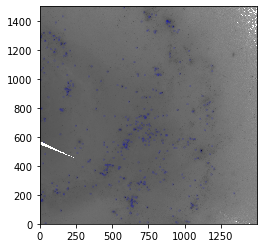

In [9]:
# Graphing circles around each found source from the 2 images
# Pre Explosion

pos1 = np.transpose((sources1['xcentroid'], sources1['ycentroid']))
aps1 = ca(pos1, r = 5.0)
plt.imshow(img1, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')

aps1.plot(color = 'blue', lw = 0.1, alpha = 1.0);
plt.savefig('wfc3.f350lp.ref_0001.drz_cropped_sources.png', dpi = 500, format = 'png')

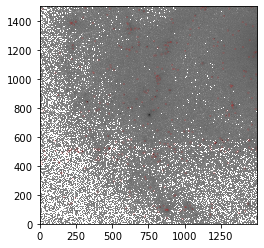

In [10]:
# Post Explosion

pos2 = np.transpose((sources2['xcentroid'], sources2['ycentroid']))
aps2 = ca(pos2, r = 5.0)
plt.imshow(img2, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')

aps2.plot(color = 'red', lw = 0.1, alpha = 1.0);
plt.savefig('iey918020_drc_cropped_sources.png', dpi = 500, format = 'png')

In [11]:
# Finding new coordinates of positions using matched (between both images) xycoords from Source Extractor

daopre_2 = DAO(fwhm = 3.0, threshold = 5.0 * std, xycoords = pre_sources_matched)

sources1_matched = daopre_2(img1-median)

for col in sources1_matched.colnames:
    if col not in ('id', 'npix'):
        sources1_matched[col].info.format = '%.2f'
        
sources1_matched.pprint(max_width = 76)

 id xcentroid ycentroid sharpness roundness1 ... sky    peak   flux  mag 
--- --------- --------- --------- ---------- ... ---- -------- ---- -----
  1   1442.27    909.92      0.47       0.16 ... 0.00    46.08 0.09  2.60
  2    813.26   1114.25      0.39       0.77 ... 0.00   939.05 0.10  2.49
  3    857.99   1060.32      0.22       0.54 ... 0.00  1061.01 0.09  2.64
  4   1169.93    888.80      0.54       0.57 ... 0.00  2235.06 0.26  1.47
  5    407.48    280.79      0.47       0.45 ... 0.00  7705.04 0.28  1.38
  6    286.23    352.21      0.65       0.44 ... 0.00  4743.90 0.21  1.67
  7    901.70    105.65      0.33       0.76 ... 0.00  8567.69 0.67  0.44
  8    918.80    156.29      0.53       0.81 ... 0.00  1786.11 0.12  2.29
  9    114.60    571.20      0.51      -0.69 ... 0.00  5143.20 0.07  2.89
 10    583.60    447.20      0.42       0.86 ... 0.00 10869.93 0.73  0.34
...       ...       ...       ...        ... ...  ...      ...  ...   ...
 40    351.16    207.23      0.36     

In [12]:
# Post Explosion

daopost_2 = DAO(fwhm = 3.0, threshold = 5.0 * std2, xycoords = post_sources_matched)

sources2_matched = daopost_2(img2-median, mask = mask)

for col in sources2_matched.colnames:
    if col not in ('id', 'npix'):
        sources2_matched[col].info.format = '%.3f'

        
sources2_matched.pprint(max_width = 76)

 id xcentroid ycentroid sharpness ...  sky     peak    flux  mag  
--- --------- --------- --------- ... ----- --------- ----- ------
  1   688.869   234.071     0.607 ... 0.000 -2299.574 0.171  1.916
  2   770.150   439.963     0.429 ... 0.000 -2299.554 0.286  1.358
  3   453.658   481.936     0.411 ... 0.000 -2299.452 0.891  0.125
  4   355.772  1288.690     0.778 ... 0.000 -2299.505 0.573  0.604
  5   548.853  1228.693     0.362 ... 0.000 -2299.413 0.958  0.046
  6   374.417  1226.695     0.308 ... 0.000 -2299.567 0.581  0.589
  7   496.812  1079.978     0.520 ... 0.000 -2299.550 0.267  1.435
  8   511.852  1063.042     0.530 ... 0.000 -2299.389 1.139 -0.141
  9   276.868  1043.596     0.504 ... 0.000 -2299.562 0.286  1.360
 10  1319.516   973.797     0.202 ... 0.000 -2299.539 0.212  1.685
 11   691.152   949.739     0.442 ... 0.000 -2299.462 0.813  0.224
 12   495.891   890.932     0.473 ... 0.000 -2299.510 0.464  0.834
 13   127.222   887.142     0.565 ... 0.000 -2299.119 3.271 -1

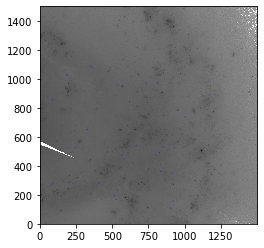

In [13]:
# Plotting New Sources
# Pre Explosion

pos1_pre = np.transpose((sources1_matched['xcentroid'], sources1_matched['ycentroid']))
aps1_pre = ca(pos1_pre, r = 5.0)
plt.imshow(img1, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')

aps1_pre.plot(color = 'blue', lw = 0.1, alpha = 1.0);
plt.savefig('wfc3.f350lp.ref_0001.drz_cropped_matched_sources.png', dpi = 500, format = 'png')

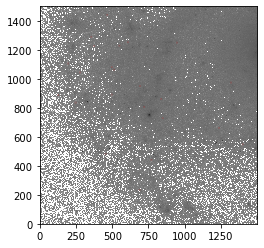

In [14]:
# Post Explosion

pos2_post = np.transpose((sources2_matched['xcentroid'], sources2_matched['ycentroid']))
aps2_post = ca(pos2_post, r = 5.0)
plt.imshow(img2, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')

aps2_post.plot(color = 'red', lw = 0.1, alpha = 1.0);
plt.savefig('iey918020_drc_cropped_matched_sources.png', dpi = 500, format = 'png')

In [19]:
#Region Files for both Pre and Post Explosions
#Pre Ex
k = open('wfc3.f350lp.ref_0001.drz_cropped_matched_sources.reg', 'w')

x_pos_matched = np.array(sources1_matched['xcentroid'])
y_pos_matched = np.array(sources1_matched['ycentroid'])

x_round_matched = ['%.3f' % x for x in x_pos_matched]
y_round_matched = ['%.3f' % y for y in y_pos_matched]

for i in range (0, len(x_round_matched)):
    k.write('point('+str(x_round_matched[i])+','+str(y_round_matched[i])+')'+' # '+ 'point=boxcircle text={'+str(i)+'} \n')
k.close()

#Post

l = open('iey918020_drc_cropped_fits_matched_sources.reg', 'w')


x_pos_2_matched = np.array(sources2_matched['xcentroid'])
y_pos_2_matched = np.array(sources2_matched['ycentroid'])

x2_round_matched = ['%.3f' % x for x in x_pos_2_matched]
y2_round_matched = ['%.3f' % y for y in y_pos_2_matched]

for i in range (0, len(x2_round_matched)):
    l.write('point('+str(x2_round_matched[i])+','+str(y2_round_matched[i])+')'+' # '+ 'point=boxcircle text={'+str(i)+'} \n')
l.close()

In [21]:
# Writing the matched list for both

j = open("2023cj.in", 'w')

for i in range(0, len(x2_round_matched)):
    for b in range(0, len(x2_round_matched)):
        j.write(str(x_round_matched[i])+','+str(y_round_matched[i])+','+str(x2_round_matched[b])+','+str(y2_round_matched[b])+' \n')
j.close()  

# This gave me a list with ~1000+ entries; I'm too lazy to optimize but if this is used please go into it and edit it, thanks <3